In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_dir = "./"
data = pd.read_csv(data_dir + "USDJPY_d2.csv")
data.loc['6300'] = ['2019-04-08','111.721','111.760','111.284','111.489']
data.loc['6301'] = ['2019-04-09','111.489','111.580','110.980','111.147']
data.loc['6302'] = ['2019-04-10','111.147','111.282','110.845','111.012']
data.loc['6303'] = ['2019-04-11','111.012','110.69','110.908','111.012']
data.loc['6304'] = ['2019-04-12','111.665','112.094','111.586','112.020']
data.loc['6305'] = ['2019-04-15','112.020','112.096','111.890','112.038']
data.loc['6306'] = ['2019-04-16','112.038','112.048','111.847','112.014']
data.tail() 

,Date,Open,High,Low,Close
6302,2019-04-10,111.147,111.282,110.845,111.012
6303,2019-04-11,111.012,110.69,110.908,111.012
6304,2019-04-12,111.665,112.094,111.586,112.020
6305,2019-04-15,112.020,112.096,111.890,112.038
6306,2019-04-16,112.038,112.048,111.847,112.014


In [3]:
data2 = np.array(data)

In [4]:
# 5日移動平均線の追加
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) 
    data2[i,5] = np.mean(tmp)

In [5]:
# 25日移動平均線の追加
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 25
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線の追加
data2 = np.c_[data2, np.zeros((len(data2),1))] 
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線の追加
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)


In [6]:
# 一目均衡表の追加
para1 =9
para2 = 26
para3 = 52

# 転換線 = （過去(para1)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 = （過去(para2)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1 = ｛ （転換値+基準値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 = ｛ （過去(para3)日間の高値+安値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2

In [7]:
# 25日ボリンジャーバンド（±1, 2シグマ）の追加
parab = 25
data2 = np.c_[data2, np.zeros((len(data2),4))] 
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp)

In [8]:
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1995-01-02,99.55,100.4,99.55,100.14,0,0,0,0,0,0,0,0,0,0,0,0
1,1995-01-03,100.21,100.68,100,100.65,0,0,0,0,0,0,0,0,0,0,0,0
2,1995-01-04,100.65,101.45,100.55,101.31,0,0,0,0,0,0,0,0,0,0,0,0
3,1995-01-05,101.31,101.35,100.75,100.9,0,0,0,0,0,0,0,0,0,0,0,0
4,1995-01-06,100.85,101.39,100.8,101.3,0,0,0,0,0,0,0,0,0,0,0,0
5,1995-01-09,101.25,101.35,99.6,99.92,100.816,0,0,0,0,0,0,0,0,0,0,0
6,1995-01-10,99.96,100.43,99.8,100.06,100.698,0,0,0,0,0,0,0,0,0,0,0
7,1995-01-11,100,100.2,99.45,99.99,100.434,0,0,0,0,0,0,0,0,0,0,0
8,1995-01-12,100.06,100.18,98.57,98.62,99.978,0,0,0,0,0,0,0,0,0,0,0
9,1995-01-13,98.7,99.07,98.25,98.55,99.428,0,0,0,99.85,0,0,0,0,0,0,0


In [9]:
# 説明変数
day_ago = 25 # 何日前までのデータを使用するのか
num_sihyou = 1 + 4 + 4 +4 # 終値1本、MVave4本、itimoku4本、ボリンジャー4本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): # 日にちごとに横向きに並べる
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [10]:
# 被説明変数となる Y = pre_day後の終値-当日終値 を作成
Y = np.zeros(len(data2))

# 何日後の値段の差を予測するのか決定
pre_day = 1
for i in range(len(Y)-pre_day):
    if X[pre_day + i,0] - X[i,0] >= 0:
        Y[i] = 1
    else:
        Y[i] = -1

In [11]:
# X, Yを正規化
original_X = np.copy(X) 
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) 
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i]) # Xを正規化
    Y[i] =  Y[i] 

In [12]:
# 学習データとテストデータへ分割
X_train = X[200:6100,:] # 200日平均を使うので、それ以降を学習データに使用
Y_train = Y[200:6100] 

X_test = X[6100:len(X),:]
Y_test = Y[6100:len(Y)]

In [13]:
def result():
    test_data = original_X[6100:len(X),0]
    test_data_result = np.c_[test_data, np.zeros((len(test_data),4))]

    for i in range(len(test_data)):
        test_data_result[i, 1] = Y_pred[i]

    for i in range(len(test_data)-1):
        if Y_pred[i] >= 0:
            test_data_result[i, 2] = test_data_result[i+1 , 0] - test_data_result[i, 0]
        else:
            test_data_result[i, 2] = test_data_result[i, 0] - test_data_result[i + 1, 0]
        
    for i in range(len(Y_pred)):
        test_data_result[i, 3] = sum(test_data_result[0:i+1, 2])
    
    test_data_result[0, 4] = test_data_result[0,0]*(1 + test_data_result[0,2]/test_data_result[0,0]) 
    for i in range(1, len(Y_pred)):
        test_data_result[i, 4] = (test_data_result[i-1, 4]/test_data_result[i, 0])*(test_data_result[i, 0] + test_data_result[i, 2])


    print("Benefit is {:.3f} yen".format(test_data_result[-1, 3])) 
    print("Benefit2 is {:.3f} yen".format(test_data_result[-1, 4]-test_data_result[0, 4]))
    data_show=pd.DataFrame(test_data_result)
    plt.plot(test_data_result[:, 3])
    return data_show#.tail()

In [14]:
def result_proba(model):
    test_data = original_X[6100:len(X),0]
    test_data_result = np.c_[test_data, np.zeros((len(test_data),4))]

    for i in range(len(test_data)):
        test_data_result[i, 1] = Y_pred[i]

    for i in range(len(test_data)-1):
        if model.predict_proba(X_test)[i][0] >= 0.6:
            test_data_result[i, 2] = test_data_result[i+1 , 0] - test_data_result[i, 0]
        elif model.predict_proba(X_test)[i][0] <= 0.4:
            test_data_result[i, 2] = test_data_result[i, 0] - test_data_result[i + 1, 0]
        else:
            continue
        
    for i in range(len(Y_pred)):
        test_data_result[i, 3] = sum(test_data_result[0:i+1, 2])
        
    test_data_result[0, 4] = test_data_result[0,0]*(1 + test_data_result[0,2]/test_data_result[0,0])
    for i in range(1, len(Y_pred)):
        test_data_result[i, 4] = (test_data_result[i-1, 4]/test_data_result[i, 0])*(test_data_result[i, 0] + test_data_result[i, 2])


    print("Benefit is {:.3f} yen".format(test_data_result[-1, 3])) 
    print("Benefit2 is {:.3f} yen".format(test_data_result[-1, 4]-test_data_result[0, 4]))
    data_show=pd.DataFrame(test_data_result)
    plt.plot(test_data_result[:, 3])
    return data_show#.tail()

In [15]:
from sklearn.svm import SVC 
svm_model = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X_train, Y_train)

In [16]:
Y_pred = svm_model.predict(X_test) # 予測

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(svm_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(svm_model.score(X_test, Y_test)))

予測日数：207、正解日数：102、正解率：49.275362318840585
Training score: 1.000
Test score: 0.488


Benefit is 0.182 yen
Benefit2 is -0.035 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,1.0,0.165,0.396,110.862000
2,110.862,1.0,-0.277,0.119,110.585000
3,110.585,1.0,-0.134,-0.015,110.451000
4,110.451,1.0,0.216,0.201,110.667000
5,110.667,1.0,-0.244,-0.043,110.423000
6,110.423,1.0,0.425,0.382,110.848000
7,110.848,1.0,0.143,0.525,110.991000
8,110.991,1.0,0.944,1.469,111.935000
9,111.935,1.0,0.592,2.061,112.527000


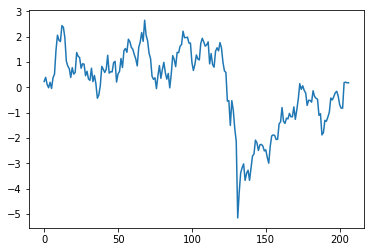

In [17]:
result()

In [18]:
from sklearn.neural_network import MLPClassifier 
mlpclassifier_model = MLPClassifier(max_iter=1000, alpha=0.1,hidden_layer_sizes=(100,100))

mlpclassifier_model.fit(X_train, Y_train) # 学習データをフィット

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
Y_pred = mlpclassifier_model.predict(X_test) # 予測

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(mlpclassifier_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(mlpclassifier_model.score(X_test, Y_test)))

予測日数：207、正解日数：115、正解率：55.55555555555556
Training score: 0.592
Test score: 0.551


Benefit is 11.286 yen
Benefit2 is 11.901 yen


,0,1,2,3,4
0,110.466,-1.0,-0.231,-0.231,110.235000
1,110.697,-1.0,-0.165,-0.396,110.070689
2,110.862,-1.0,0.277,-0.119,110.345711
3,110.585,-1.0,0.134,0.015,110.479422
4,110.451,-1.0,-0.216,-0.201,110.263366
5,110.667,-1.0,0.244,0.043,110.506476
6,110.423,-1.0,-0.425,-0.382,110.081155
7,110.848,-1.0,-0.143,-0.525,109.939144
8,110.991,-1.0,-0.944,-1.469,109.004090
9,111.935,-1.0,-0.592,-2.061,108.427591


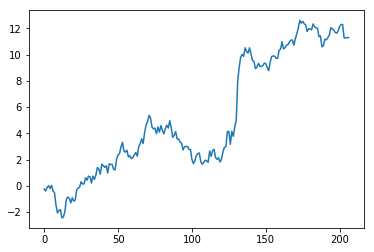

In [20]:
result()

Benefit is -3.144 yen
Benefit2 is -3.175 yen


,0,1,2,3,4
0,110.466,-1.0,0.000,0.000,110.466000
1,110.697,-1.0,0.000,0.000,110.466000
2,110.862,-1.0,0.000,0.000,110.466000
3,110.585,-1.0,0.000,0.000,110.466000
4,110.451,-1.0,0.000,0.000,110.466000
5,110.667,-1.0,0.000,0.000,110.466000
6,110.423,-1.0,0.000,0.000,110.466000
7,110.848,-1.0,0.000,0.000,110.466000
8,110.991,-1.0,0.000,0.000,110.466000
9,111.935,-1.0,0.000,0.000,110.466000


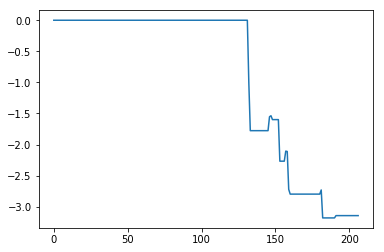

In [21]:
result_proba(mlpclassifier_model)

In [22]:
mlpclassifier_model.predict_proba(X_test)

array([[0.56248357, 0.43751643],
       [0.57870899, 0.42129101],
       [0.57959326, 0.42040674],
       [0.57065484, 0.42934516],
       [0.56209286, 0.43790714],
       [0.56404804, 0.43595196],
       [0.55176105, 0.44823895],
       [0.53535898, 0.46464102],
       [0.53473045, 0.46526955],
       [0.55560239, 0.44439761],
       [0.55269003, 0.44730997],
       [0.54126165, 0.45873835],
       [0.53203665, 0.46796335],
       [0.56624993, 0.43375007],
       [0.57822833, 0.42177167],
       [0.55562111, 0.44437889],
       [0.51240804, 0.48759196],
       [0.49021818, 0.50978182],
       [0.47995312, 0.52004688],
       [0.48538049, 0.51461951],
       [0.49195956, 0.50804044],
       [0.48883171, 0.51116829],
       [0.49325277, 0.50674723],
       [0.51060346, 0.48939654],
       [0.52963479, 0.47036521],
       [0.52723154, 0.47276846],
       [0.50920606, 0.49079394],
       [0.50862334, 0.49137666],
       [0.50498852, 0.49501148],
       [0.50220592, 0.49779408],
       [0.

In [23]:
#　データの前処理
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [24]:
X_train_scaled = scaler.transform(X_train)
print("transformed shape: {}".format(X_train_scaled.shape))
X_train_scaled.mean(axis=0)

transformed shape: (5900, 325)


array([-1.67568442e-02, -1.69245727e-02, -1.68113434e-02, -2.14865580e-02,
       -2.71541140e-02, -2.71600268e-02, -2.99601659e-02, -2.97430106e-02,
       -2.47816697e-02, -2.25343421e-02, -1.25171650e-02, -5.71799914e-03,
        1.21626659e-02,  1.28108186e-02,  1.95402940e-02,  2.50466513e-02,
        2.58828220e-02,  2.33108747e-02,  2.13204650e-02,  2.32525912e-02,
        2.84483369e-02,  2.95509794e-02,  3.14203902e-02,  2.78920979e-02,
        2.79312674e-02, -1.50587232e-02, -9.69647118e-03, -9.88127176e-03,
       -1.47484649e-02, -1.49506817e-02, -2.32127685e-02, -2.53812019e-02,
       -2.17055314e-02, -1.64313793e-02, -2.17381954e-03,  1.25724000e-02,
        1.89653704e-02,  2.48476042e-02,  2.16302942e-02,  1.49637976e-02,
        1.84477898e-02,  2.80614595e-02,  3.05140330e-02,  3.60355593e-02,
        3.61028784e-02,  3.07143886e-02,  2.51222343e-02,  2.53407387e-02,
        2.19873199e-02,  2.70537864e-02,  0.00000000e+00,  2.58555710e-02,
        2.47838521e-02,  

In [25]:
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier # scikit-learnライブラリの関数を使用します
mlpclassifier_model_d = MLPClassifier(max_iter=1000, alpha=0.1,hidden_layer_sizes=(100,100))

mlpclassifier_model_d.fit(X_train_scaled, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [26]:
Y_pred = mlpclassifier_model_d.predict(X_test_scaled) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(mlpclassifier_model_d.score(X_train_scaled, Y_train)))
print("Test score: {:.3f}".format(mlpclassifier_model.score(X_test_scaled, Y_test)))

予測日数：207、正解日数：115、正解率：55.55555555555556
Training score: 0.718
Test score: 0.512


Benefit is 6.042 yen
Benefit2 is 5.879 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,1.0,0.165,0.396,110.862000
2,110.862,1.0,-0.277,0.119,110.585000
3,110.585,-1.0,0.134,0.253,110.719000
4,110.451,-1.0,-0.216,0.037,110.502476
5,110.667,-1.0,0.244,0.281,110.746113
6,110.423,-1.0,-0.425,-0.144,110.319870
7,110.848,-1.0,-0.143,-0.287,110.177551
8,110.991,-1.0,-0.944,-1.231,109.240469
9,111.935,-1.0,-0.592,-1.823,108.662720


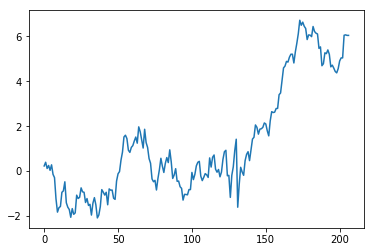

In [27]:
result()